In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Flatten,Dense,Input,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X_train_origin = pd.read_csv('../data/featured_data/X_train.csv')
y_train_origin = pd.read_csv('../data/featured_data/y_train.csv')

y_train_no_log = np.expm1(y_train_origin)

X_train_origin = X_train_origin.to_numpy()
y_train_no_log = y_train_no_log.to_numpy()
y_train_no_log = y_train_no_log.ravel()
X_train, X_val, y_train, y_val = train_test_split(X_train_origin, y_train_no_log, test_size=0.2, random_state=1) 
input_dim=X_train.shape[1]

In [3]:
model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='elu',kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
model.add(Dense(32, activation='elu',kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='linear'))
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_squared_error')

In [4]:
epoch=300

In [5]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=epoch, verbose=1)

Train on 1168 samples, validate on 292 samples
Epoch 1/300
1168/1168 [==============================] - 1s 916us/sample - loss: 39291230909.3699 - val_loss: 38026355641.8630
Epoch 2/300
1168/1168 [==============================] - 0s 96us/sample - loss: 39289219605.0411 - val_loss: 38023815672.9863
Epoch 3/300
1168/1168 [==============================] - 0s 96us/sample - loss: 39284881211.6164 - val_loss: 38018193436.0548
Epoch 4/300
1168/1168 [==============================] - 0s 94us/sample - loss: 39275647480.9863 - val_loss: 38006863226.7397
Epoch 5/300
1168/1168 [==============================] - 0s 91us/sample - loss: 39257828702.6849 - val_loss: 37986426318.9041
Epoch 6/300
1168/1168 [==============================] - 0s 91us/sample - loss: 39227213683.7260 - val_loss: 37952286215.0137
Epoch 7/300
1168/1168 [==============================] - 0s 95us/sample - loss: 39178856756.6027 - val_loss: 37902332633.4247
Epoch 8/300
1168/1168 [==============================] - 0s 94us/sampl

1168/1168 [==============================] - 0s 95us/sample - loss: 9312217592.9863 - val_loss: 10836703270.5753
Epoch 66/300
1168/1168 [==============================] - 0s 96us/sample - loss: 9169994120.7671 - val_loss: 10692804039.8904
Epoch 67/300
1168/1168 [==============================] - 0s 98us/sample - loss: 9031925626.7397 - val_loss: 10553538731.8356
Epoch 68/300
1168/1168 [==============================] - 0s 93us/sample - loss: 8896909999.3425 - val_loss: 10422530009.4247
Epoch 69/300
1168/1168 [==============================] - 0s 95us/sample - loss: 8767280313.8630 - val_loss: 10285888550.5753
Epoch 70/300
1168/1168 [==============================] - 0s 107us/sample - loss: 8637171305.2055 - val_loss: 10160347844.3836
Epoch 71/300
1168/1168 [==============================] - 0s 102us/sample - loss: 8511595477.9178 - val_loss: 10036489738.5205
Epoch 72/300
1168/1168 [==============================] - 0s 94us/sample - loss: 8385547193.8630 - val_loss: 9910749194.5205
Epoc

1168/1168 [==============================] - 0s 91us/sample - loss: 2138848122.7397 - val_loss: 3067993163.3973
Epoch 131/300
1168/1168 [==============================] - 0s 90us/sample - loss: 2088404897.3151 - val_loss: 2994775196.0548
Epoch 132/300
1168/1168 [==============================] - 0s 94us/sample - loss: 2035727475.7260 - val_loss: 2923166744.5479
Epoch 133/300
1168/1168 [==============================] - 0s 93us/sample - loss: 1988446714.7397 - val_loss: 2858338482.8493
Epoch 134/300
1168/1168 [==============================] - 0s 97us/sample - loss: 1945456396.2740 - val_loss: 2794590802.4110
Epoch 135/300
1168/1168 [==============================] - 0s 93us/sample - loss: 1901775924.6027 - val_loss: 2736318712.9863
Epoch 136/300
1168/1168 [==============================] - 0s 90us/sample - loss: 1862143111.0137 - val_loss: 2686602580.1644
Epoch 137/300
1168/1168 [==============================] - 0s 101us/sample - loss: 1824304599.6712 - val_loss: 2630707683.0685
Epoch

1168/1168 [==============================] - 0s 96us/sample - loss: 1044402430.2466 - val_loss: 1686979495.0137
Epoch 196/300
1168/1168 [==============================] - 0s 96us/sample - loss: 1036976348.0548 - val_loss: 1691931404.7123
Epoch 197/300
1168/1168 [==============================] - 0s 92us/sample - loss: 1032513342.2466 - val_loss: 1680711476.1644
Epoch 198/300
1168/1168 [==============================] - 0s 91us/sample - loss: 1026850206.6849 - val_loss: 1683246542.0274
Epoch 199/300
1168/1168 [==============================] - 0s 91us/sample - loss: 1021674173.3699 - val_loss: 1676053491.2877
Epoch 200/300
1168/1168 [==============================] - 0s 94us/sample - loss: 1016191693.1507 - val_loss: 1674056565.9178
Epoch 201/300
1168/1168 [==============================] - 0s 93us/sample - loss: 1013756122.3014 - val_loss: 1669534318.9041
Epoch 202/300
1168/1168 [==============================] - 0s 92us/sample - loss: 1008727450.3014 - val_loss: 1660393086.6849
Epoch 

1168/1168 [==============================] - 0s 91us/sample - loss: 846233499.1781 - val_loss: 1531506376.9863
Epoch 261/300
1168/1168 [==============================] - 0s 92us/sample - loss: 844458576.6575 - val_loss: 1527828601.6438
Epoch 262/300
1168/1168 [==============================] - 0s 91us/sample - loss: 842894063.7808 - val_loss: 1523646468.3836
Epoch 263/300
1168/1168 [==============================] - 0s 93us/sample - loss: 841216077.1507 - val_loss: 1521145522.6301
Epoch 264/300
1168/1168 [==============================] - 0s 92us/sample - loss: 838975160.1096 - val_loss: 1519859656.5479
Epoch 265/300
1168/1168 [==============================] - 0s 91us/sample - loss: 837033982.6849 - val_loss: 1521517887.3425
Epoch 266/300
1168/1168 [==============================] - 0s 90us/sample - loss: 835142997.4795 - val_loss: 1519367338.5205
Epoch 267/300
1168/1168 [==============================] - 0s 91us/sample - loss: 834059819.3973 - val_loss: 1514712735.1233
Epoch 268/300


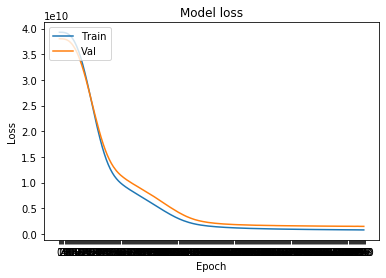

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks([x for x in range(epoch+1)])
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [7]:
##  NN is not suitable for regression task, hard for hyperparameter tuning and explanation
##  val_loss: 1473264389.4795
##  RMSE > 38000, worse than ML models